In [2]:
pip install cartopy

  Obtaining dependency information for cartopy from https://files.pythonhosted.org/packages/07/31/11428c479d9eddb5a1f1bef9ad51320db35c612f992163b72739581eef6e/Cartopy-0.23.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for shapely>=1.7 from https://files.pythonhosted.org/packages/25/aa/53f145e5a610a49af9ac49f2f1be1ec8659ebd5c393d66ac94e57c83b00e/shapely-2.0.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for pyshp>=2.3 from https://files.pythonhosted.org/packages/98/2f/68116db5b36b895c0450e3072b8cb6c2fac0359279b182ea97014d3c8ac0/pyshp-2.3.1-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 321.6 kB/s eta 0:00:00 kB/s eta 0:00:01
  Obtaining dependency information for pyproj>=3.3.1 from https://files.pythonhosted.org/packages/64/90/dfe5c00de1ca4dbb82606e79790659d4ed7f0ed8d372bccb3baca2a5abe0/pyproj-3.6.1-cp311-cp311-manylinux_2_17_x86_6

In [1]:
#importing libraries

import xarray as xr
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.colors as mcolors
import numpy as np
from matplotlib import cm
import cartopy.crs as ccrs
from cartopy import feature as cf

In [6]:
ds_temp=xr.open_dataset('Ghana_ERA5_dTx_1981_2020.nc')
ds_temp

<xarray.Dataset>
Dimensions:    (time: 14610, longitude: 22, latitude: 33)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01T15:00:00 ... 2020-12-31T15:00:00
  * longitude  (longitude) float32 -3.75 -3.5 -3.25 -3.0 ... 0.75 1.0 1.25 1.5
  * latitude   (latitude) float32 12.5 12.25 12.0 11.75 ... 5.25 5.0 4.75 4.5
Data variables:
    mx2t       (time, latitude, longitude) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Jan 27 11:02:48 2022: cdo sellonlatbox,-3.75,1.5,4.5,12...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [8]:
da_temp=ds_temp['mx2t']
da_temp

<xarray.DataArray 'mx2t' (time: 14610, latitude: 33, longitude: 22)>
[10606860 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01T15:00:00 ... 2020-12-31T15:00:00
  * longitude  (longitude) float32 -3.75 -3.5 -3.25 -3.0 ... 0.75 1.0 1.25 1.5
  * latitude   (latitude) float32 12.5 12.25 12.0 11.75 ... 5.25 5.0 4.75 4.5
Attributes:
    long_name:  Maximum temperature at 2 metres since previous post-processing
    units:      K

In [9]:
Year=['1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009', '2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
Month=['January','February','March','April','May','June','July','August','September','October','November','December']
coords_temp = da_temp.sel(longitude=-1.0232,latitude=7.965, method = 'nearest')
date_temp=coords_temp.sel(time=slice('1991','2020'))
group_months=date_temp.groupby('time.month').mean('time')
group_years=date_temp.groupby('time.year').mean('time')
group_years=group_years.where(group_years != -99 )

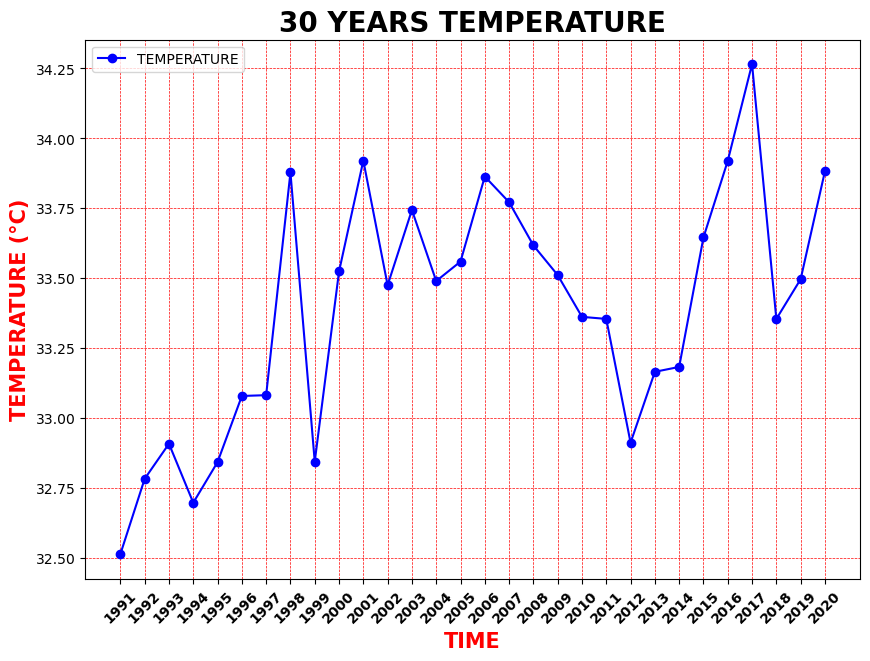

In [10]:
plt.rcParams['figure.figsize']=[10,7]
plt.plot(Year,group_years, color='b', marker='o',label='TEMPERATURE')
plt.grid(True, linestyle='--', linewidth=0.5,color='red',alpha=1)
plt.xlabel('TIME',fontsize=15, fontweight='bold',color='red')
plt.xticks(rotation=45,fontweight='bold')
plt.ylabel('TEMPERATURE (°C)',fontsize=15, fontweight='bold',color='red', alpha=1)
plt.title('30 YEARS TEMPERATURE',fontweight='bold',fontsize=20)
plt.legend(loc='upper left')
plt.savefig('project.png', dpi=500)

# map

In [9]:
temp=da_temp.sel(time=slice('1991','2020'))
year_temp=temp.groupby('time.year').mean('time')
year_temp=year_temp.where(year_temp != 191780)
year_temp

<xarray.DataArray 'mean' (year: 30, latitude: 33, longitude: 22)>
array([[[28.957117, 29.164928, 29.269505, ..., 28.835999, 28.882486,
         28.927269],
        [28.536537, 28.65206 , 28.79718 , ..., 28.721819, 28.836369,
         28.861317],
        [28.287304, 28.403967, 28.581394, ..., 29.04315 , 29.09222 ,
         28.833426],
        ...,
        [25.970024, 25.987387, 25.991158, ..., 26.402039, 26.416927,
         26.429674],
        [26.073362, 26.065428, 26.067335, ..., 26.408394, 26.423609,
         26.443811],
        [26.130733, 26.124195, 26.122091, ..., 26.399254, 26.42737 ,
         26.447384]],

       [[28.101362, 28.246897, 28.25016 , ..., 28.597015, 28.616096,
         28.690033],
        [27.818901, 27.860592, 27.96343 , ..., 28.513634, 28.656204,
         28.686209],
        [27.636719, 27.682663, 27.802254, ..., 28.828527, 28.918337,
         28.720762],
...
        [26.461517, 26.49211 , 26.501144, ..., 26.978802, 26.994188,
         27.006842],
        [26.602526, 26.609474, 26.617422, ..., 26.978212, 26.992653,
         26.99852 ],
        [26.684942, 26.692003, 26.696236, ..., 26.969967, 26.982674,
         26.988382]],

       [[28.922813, 29.051811, 29.110506, ..., 29.15097 , 29.198   ,
         29.274137],
        [28.816582, 28.834894, 28.927382, ..., 29.079716, 29.276222,
         29.28565 ],
        [28.59411 , 28.715601, 28.858885, ..., 29.247477, 29.360146,
         29.196482],
        ...,
        [26.455767, 26.499493, 26.506193, ..., 26.818628, 26.844582,
         26.861523],
        [26.565538, 26.572193, 26.577997, ..., 26.811773, 26.836645,
         26.855223],
        [26.627563, 26.634409, 26.637842, ..., 26.802593, 26.827745,
         26.846058]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -3.75 -3.5 -3.25 -3.0 ... 0.75 1.0 1.25 1.5
  * latitude   (latitude) float32 12.5 12.25 12.0 11.75 ... 5.25 5.0 4.75 4.5
  * year       (year) int64 1991 1992 1993 1994 1995 ... 2017 2018 2019 2020

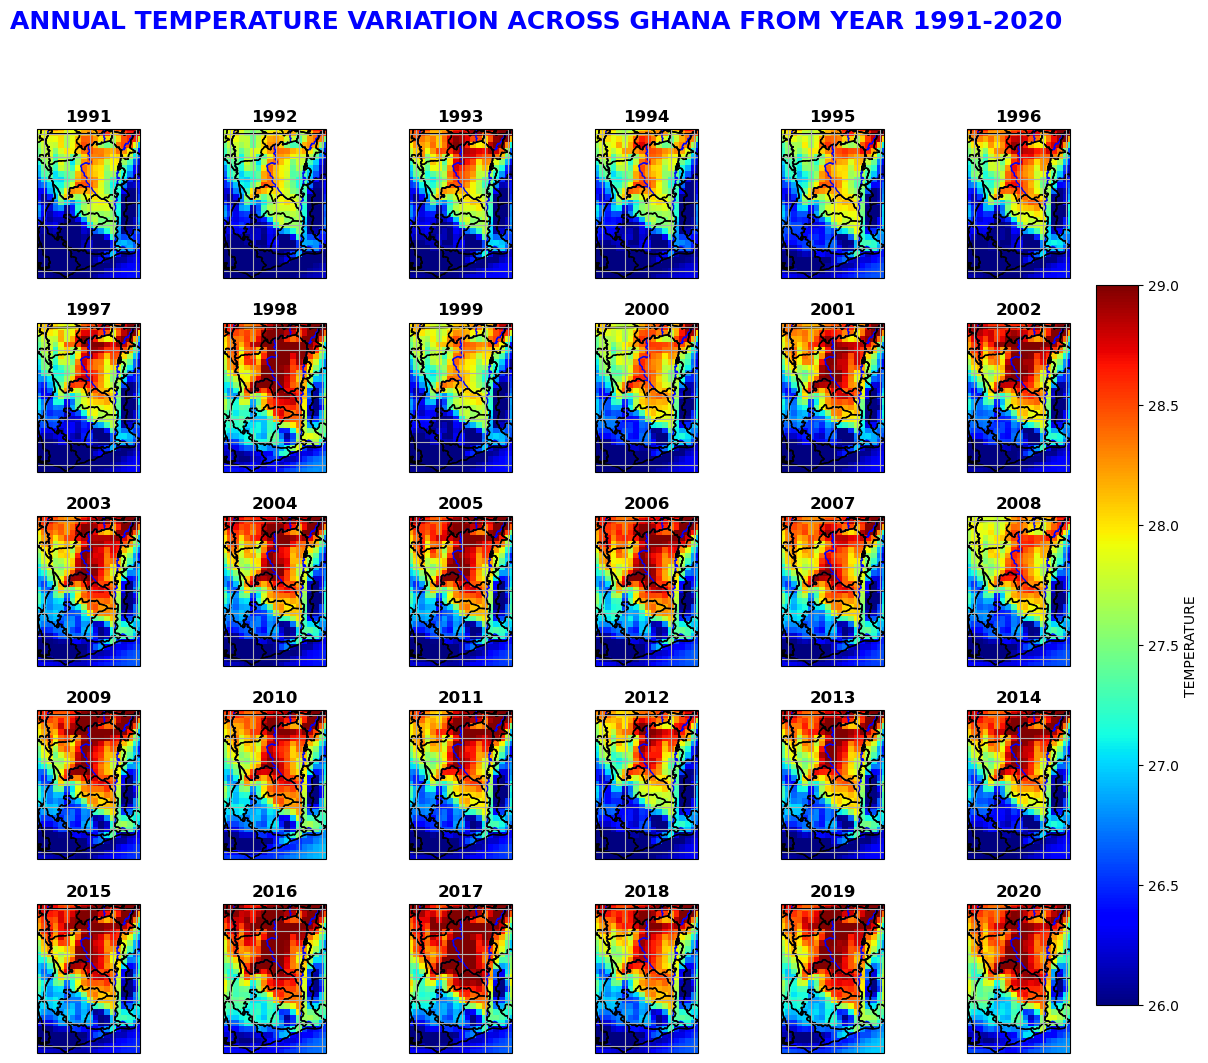

In [11]:

fig, axes = plt.subplots(5,6,figsize=(14, 12), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     #ADDING FEATURES
    ax[i].coastlines(resolution='10m')
    ax[i].add_feature(cf.BORDERS)
    ax[i].add_feature(cf.LAND)
    ax[i].add_feature(cf.RIVERS, color='b')
    ax[i].add_feature(cf.STATES)
    ax[i].add_feature(cf.OCEAN)
    ax[i].set_title(Year[i], fontweight='bold')
    ax[i].set_extent ([-3.3,1.2,11.2,4.7])
    cmap = plt.get_cmap('jet')
    colors = cmap(np.arange(cmap.N))
    new_map = mcolors.LinearSegmentedColormap.from_list('jet', colors)
    cs = ax[i].pcolormesh(year_temp['longitude'],year_temp['latitude'],year_temp[i], cmap=new_map, vmax=29,vmin=26)
    # modify colormap
    #colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    #new_map = mcolors.LinearSegmentedColormap.from_list('viridis', colors)
    grid=ax[i].gridlines()
    grid.xlabels_bottom=True; grid.ylabels_left=True;
    grid.xformatter=LONGITUDE_FORMATTER
    grid.yformatter=LATITUDE_FORMATTER
    plt.subplots_adjust(wspace=0.2,hspace=0.3)
    fig.suptitle('ANNUAL TEMPERATURE VARIATION ACROSS GHANA FROM YEAR 1991-2020', fontsize=18, color='b',fontweight='bold')
cbar = fig.add_axes([0.9, 0.15, 0.03, 0.6])
fig.colorbar(cs,cax=cbar, orientation='vertical',label='TEMPERATURE')
plt.savefig('map.png',dpi=500)

In [12]:
#from this temperature is increasing from the north to the south as the years go by

# 2.

# TEMPERATURE ANALYSIS ON MONTHS

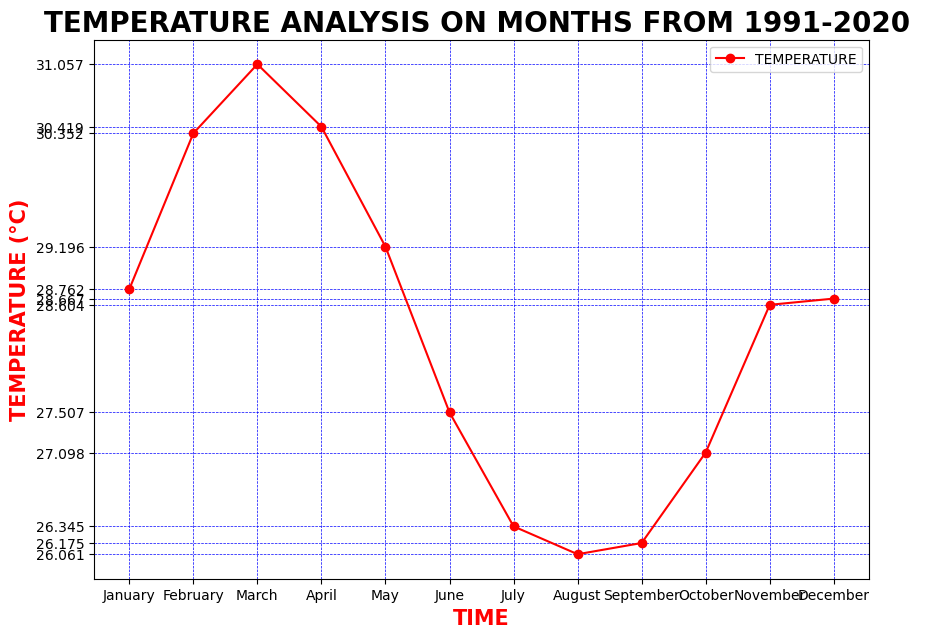

In [16]:
ds=xr.open_dataset('exprGhana_ERA5_dTxn_1981_2020.nc')['mean'].sel(longitude=-1.0232,latitude=7.965,method='nearest')
da=ds.sel(time=slice('1991','2020')).groupby('time.month').mean('time')
plt.plot(Month,da, marker='o',color='r',label='TEMPERATURE')

plt.rcParams['figure.figsize']=[13,7]
plt.grid(True, linestyle='--', linewidth=0.5,color='blue',alpha=1)
plt.xlabel('TIME',fontsize=15, fontweight='bold',color='red')
#plt.xticks(rotation=45,fontweight='bold')
plt.ylabel('TEMPERATURE (°C)',fontsize=15, fontweight='bold',color='red', alpha=1)
plt.title('TEMPERATURE ANALYSIS ON MONTHS FROM 1991-2020 ',fontweight='bold',fontsize=20)
plt.legend(loc='upper right')
#grid_params = {'linewidth':0.5,'linestyle':'--','color':'blue'}
#plt.grid(True,**grid_params)

plt.yticks(da)

#plt.xlim(0, 19000)
#plt.ylim(25.5,30.5)
plt.savefig('month_project.png', dpi=500)

In [17]:
# from this, temperatures are high mostly in February,March,April and May

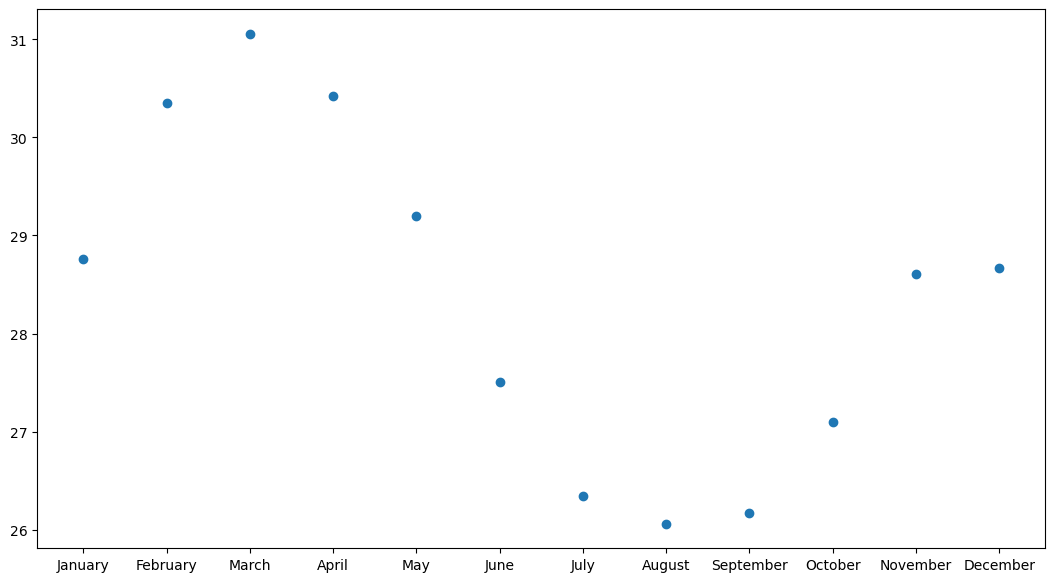

In [18]:
plt.plot(Month,da, 'o')

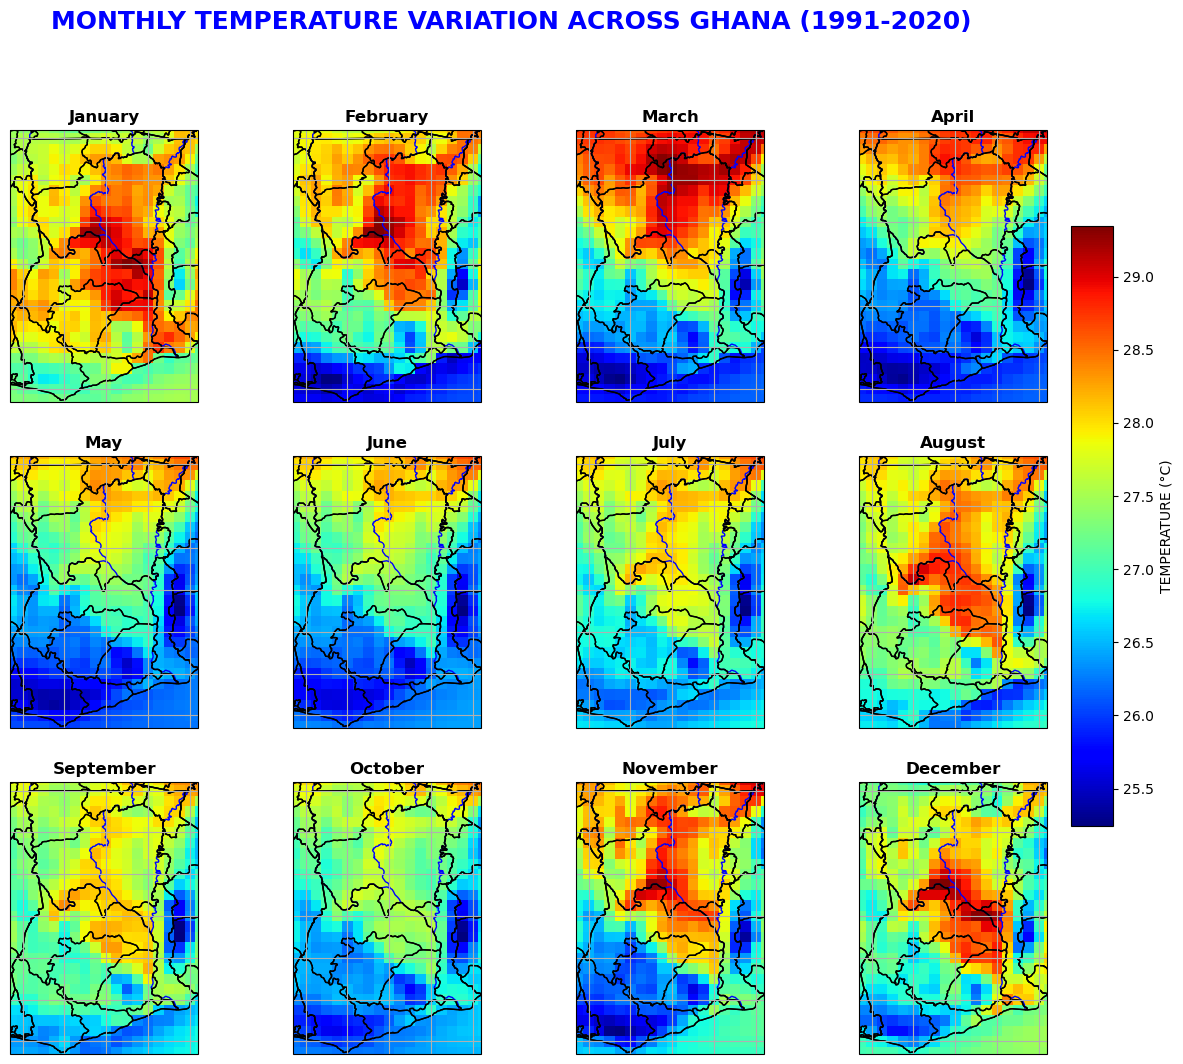

In [26]:
d=xr.open_dataset('exprGhana_ERA5_dTxn_1981_2020.nc')['mean']
f=d.sel(time=slice('1991','2020')).groupby('time.month').mean('time')

fig, axes = plt.subplots(3,4,figsize=(14, 12), subplot_kw={'projection': ccrs.PlateCarree()})
ax = axes.flatten()
for i, v in enumerate(ax):
     #ADDING FEATURES
    ax[i].coastlines(resolution='10m')
    ax[i].add_feature(cf.BORDERS)
    ax[i].add_feature(cf.LAND)
    ax[i].add_feature(cf.RIVERS, color='b')
    ax[i].add_feature(cf.STATES)
    ax[i].add_feature(cf.OCEAN)
    ax[i].set_title(Month[i], fontweight='bold')
    ax[i].set_extent ([-3.3,1.2,11.2,4.7])
    cmap = plt.get_cmap('jet')
    colors = cmap(np.arange(cmap.N))
    new_map = mcolors.LinearSegmentedColormap.from_list('jet', colors)
    cs = ax[i].pcolormesh(f['longitude'],f['latitude'],f[i], cmap=new_map)
    # modify colormap
    #colors = cmap(np.arange(cmap.N))
    colors[0] = np.array([1.0, 1.0, 1.0, 1.0]) 
    #new_map = mcolors.LinearSegmentedColormap.from_list('viridis', colors)
    grid=ax[i].gridlines()
    grid.xlabels_bottom=False; grid.ylabels_left=False;
    grid.xformatter=LONGITUDE_FORMATTER
    grid.yformatter=LATITUDE_FORMATTER
    plt.subplots_adjust(wspace=0.2,hspace=0.2)
    fig.suptitle('MONTHLY TEMPERATURE VARIATION ACROSS GHANA (1991-2020)', fontsize=18, color='b',fontweight='bold')
cbar = fig.add_axes([0.9, 0.3, 0.03, 0.5])
fig.colorbar(cs,cax=cbar, orientation='vertical',label='TEMPERATURE (°C)')
plt.savefig('month_map.png',dpi=500)

In [20]:
f

<xarray.DataArray 'tmp' (month: 12, lat: 360, lon: 720)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:                   near-surface temperature
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

In [15]:
d

<xarray.DataArray 'tmp' (time: 1452, lat: 360, lon: 720)>
[376358400 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2021-12-16
Attributes:
    long_name:                   near-surface temperature
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0